In [1]:
import open3d as o3d
import numpy as np
import os
import json
import trimesh

In [2]:
def collect_data():
    labels = []
    stls = []
    
    for rpath in os.listdir("data"):
        if rpath == ".DS_Store":
            continue
        for jpath in os.listdir("data/"+rpath):
            if jpath ==".DS_Store":
                continue
            if jpath == "upper":
                continue
            for idpath in sorted(os.listdir("data/"+rpath+'/'+jpath)):
                if idpath ==".DS_Store":
                    continue
                for item in os.listdir("data/"+rpath+'/'+jpath + '/' + idpath):
                    if item.split('.')[-1] == 'json':
                        labels.append('data/' + rpath + '/'+ jpath + '/' + idpath + '/' + item)
                    elif item.split('.')[-1] == 'obj':
                        stls.append('data/' + rpath + '/'+ jpath + '/' + idpath  + '/' + item)
 

    print('number of label :', len(labels))
    print('number of 3D obj :', len(stls))

    # print(max(shape), min(shape))

    return stls, labels

In [3]:
all_x, all_y = collect_data()

number of label : 750
number of 3D obj : 750


In [9]:
f = open(all_y[0])
label = json.load(f)["instances"]
len(label)

84452

In [10]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 14,
 0,
 7,
 7,
 13,
 12,
 0,
 9,
 14,
 10,
 0,
 0,
 0,
 0,
 4,
 8,
 14,
 0,
 0,
 11,
 14,
 11,
 9,
 4,
 0,
 0,
 2,
 2,
 0,
 0,
 4,
 0,
 0,
 5,
 4,
 8,
 0,
 4,
 14,
 13,
 12,
 12,
 9,
 14,
 0,
 12,
 11,
 14,
 0,
 11,
 9,
 10,
 0,
 14,
 9,
 9,
 10,
 0,
 12,
 1,
 0,
 3,
 2,
 0,
 5,
 0,
 10,
 0,
 8,
 0,
 1,
 10,
 14,
 0,
 0,
 5,
 11,
 13,
 3,
 6,
 7,
 2,
 0,
 0,
 0,
 0,
 8,
 3,
 10,
 4,
 0,
 13,
 9,
 13,
 12,
 10,
 10,
 0,
 2,
 7,
 11,
 13,
 0,
 11,
 0,
 4,
 1,
 10,
 5,
 12,
 0,
 10,
 0,
 13,
 13,
 0,
 0,
 11,
 4,
 14,
 9,
 0,
 11,
 13,
 10,
 8,
 0,
 0,
 3,
 0,
 3,
 6,
 5,
 0,
 0,
 0,
 14,
 3,
 13,
 13,
 0,
 1,
 6,
 11,
 0,
 10,
 1,
 13,
 10,
 0,
 0,
 4,
 0,
 10,
 10,
 9,
 1,
 12,
 0,
 11,
 10,
 6,
 14,
 0,
 10,
 11,
 7,
 1,
 11,
 13,
 12,
 1,
 6,
 4,
 0,
 8,
 8,
 7,
 5,
 12,
 4,
 1,
 8,
 0,
 0,
 0,
 0,
 0,
 14,
 6,
 12,
 0,
 10,
 8,
 13,
 10,
 2,
 6,
 13,
 8,
 1,
 0,
 7,
 12,
 6,
 0,
 9,
 13,
 4,
 0,
 0,
 0,
 4,
 10,
 7,
 10,
 

In [11]:
f = open(all_y[0])
label = json.load(f)["labels"]
len(label)

84452

In [12]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 37,
 35,
 0,
 42,
 42,
 36,
 45,
 0,
 32,
 35,
 46,
 0,
 0,
 0,
 0,
 43,
 34,
 35,
 0,
 0,
 47,
 35,
 47,
 32,
 43,
 0,
 0,
 37,
 37,
 0,
 0,
 43,
 0,
 0,
 31,
 43,
 34,
 0,
 43,
 35,
 36,
 45,
 45,
 32,
 35,
 0,
 45,
 47,
 35,
 0,
 47,
 32,
 46,
 0,
 35,
 32,
 32,
 46,
 0,
 45,
 44,
 0,
 41,
 37,
 0,
 31,
 0,
 46,
 0,
 34,
 0,
 44,
 46,
 35,
 0,
 0,
 31,
 47,
 36,
 41,
 33,
 42,
 37,
 0,
 0,
 0,
 0,
 34,
 41,
 46,
 43,
 0,
 36,
 32,
 36,
 45,
 46,
 46,
 0,
 37,
 42,
 47,
 36,
 0,
 47,
 0,
 43,
 44,
 46,
 31,
 45,
 0,
 46,
 0,
 36,
 36,
 0,
 0,
 47,
 43,
 35,
 32,
 0,
 47,
 36,
 46,
 34,
 0,
 0,
 41,
 0,
 41,
 33,
 31,
 0,
 0,
 0,
 35,
 41,
 36,
 36,
 0,
 44,
 33,
 47,
 0,
 46,
 44,
 36,
 46,
 0,
 0,
 43,
 0,
 46,
 46,
 32,
 44,
 45,
 0,
 47,
 46,
 33,
 35,
 0,
 46,
 47,
 42,
 44,
 47,
 36,
 45,
 44,
 33,
 43,
 0,
 34,
 34,
 42,
 31,
 45,
 43,
 44,
 34,
 0,
 0,
 0,
 0,
 0,
 35,
 33,
 45,
 0,
 46,
 34,
 36,
 46,
 37,
 33,
 36,
 34

In [6]:
mesh =  trimesh.load(all_x[0])
vertices = np.asarray(mesh.vertices, dtype=np.float32)
vertices.shape

(84452, 3)

In [7]:
mesh.faces

TrackedArray([[ 1560,   486,    95],
              [ 1021,  1994,   315],
              [ 2078,  1519,  1579],
              ...,
              [17065, 27309, 84451],
              [ 7553, 84451, 32839],
              [84451, 27309, 32839]])

In [8]:
mesh.faces.shape

(168794, 3)

In [30]:
def rotate_point_cloud_z(data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          Nx3 array, original  point clouds
        Return:
          Nx3 array, rotated  point clouds
    """
    # rotated_data = np.zeros(batch_data.shape, dtype=np.float32)

    rotation_angle = np.random.uniform() * 2 * np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    rotation_matrix = np.array([[cosval, sinval, 0],
                                [-sinval, cosval, 0],
                                [0, 0, 1]])

    rotated_data= np.dot(data.reshape((-1, 3)), rotation_matrix)
    return rotated_data

In [37]:
def rotate_perturbation_point_cloud(data, angle_sigma=0.4, angle_clip=0.18):
    """ Randomly perturb the point clouds by small rotations
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    angles = np.clip(angle_sigma*np.random.randn(3), -angle_clip, angle_clip)
    Rx = np.array([[1,0,0],
                    [0,np.cos(angles[0]),-np.sin(angles[0])],
                    [0,np.sin(angles[0]),np.cos(angles[0])]])
    Ry = np.array([[np.cos(angles[1]),0,np.sin(angles[1])],
                    [0,1,0],
                    [-np.sin(angles[1]),0,np.cos(angles[1])]])
    Rz = np.array([[np.cos(angles[2]),-np.sin(angles[2]),0],
                    [np.sin(angles[2]),np.cos(angles[2]),0],
                    [0,0,1]])
    R = np.dot(Rz, np.dot(Ry,Rx))
    
    rotated_data = np.dot(data.reshape((-1, 3)), R)

    return rotated_data

In [40]:
def zoom_point_cloud(data, zoom_factor):
    # Calculate the centroid of the point cloud
    centroid = np.mean(data, axis=0)

    # Translate the point cloud so that the centroid is at the origin
    translated_points = data - centroid

    # Scale the translated point cloud based on the zoom factor
    scaled_points = translated_points * zoom_factor

    # Translate the scaled point cloud back to the original position
    zoomed_points = scaled_points + centroid

    return zoomed_points

In [54]:
def normalize_pc(points):
    centroid = np.mean(points, axis=0)
    points -= centroid
    furthest_distance = np.max(np.sqrt(np.sum(abs(points)**2,axis=-1)))
    points /= furthest_distance
    return points

In [32]:
import random
def random_sampler(total):
    cls_dict = {i:[] for i in range(15 )}
    # choiced = {i:[] for i in range(15 )}

    for idx in range(len(total)):
        cls_dict[total[idx]].append(idx)

    sampler = []
    for i in range(15 ):
        if len(cls_dict[i]) == 0:
            c = 0
        else:
            c = i

        if len(cls_dict[c]) < 500:
            subsample = np.random.choice(cls_dict[c], 500, replace=True)
        else:
            subsample = np.random.choice(cls_dict[c], 500, replace=False)

        sampler +=  list(subsample)

    # sampler = list(choiced.values())
    # print(sampler)
    # sampler = np.linspace(0, (total-1), num=self.n_point, dtype=int)
    # random.shuffle(sampler)
    return sampler

In [33]:
idx = random_sampler(label)
        
labeled = [label[i] for i in idx]
vertices = vertices[idx]

In [58]:
vertices_aug = zoom_point_cloud(vertices, 20)
vertices_aug = normalize_pc(vertices_aug)

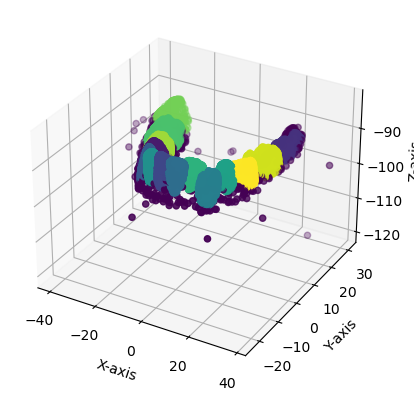

In [35]:
import matplotlib.pyplot as plt

# Assuming 'points' is your point cloud data
x = vertices[:, 0]
y = vertices[:, 1]
z = vertices[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labeled, marker='o')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

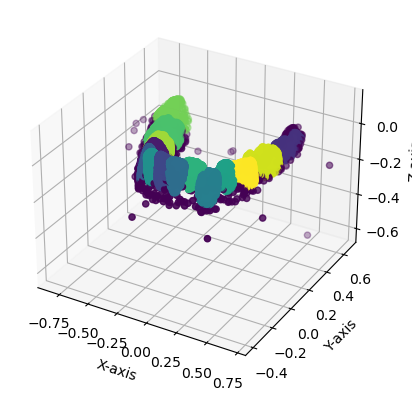

In [59]:
import matplotlib.pyplot as plt

# Assuming 'points' is your point cloud data
x = vertices_aug[:, 0]
y = vertices_aug[:, 1]
z = vertices_aug[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labeled, marker='o')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

In [4]:
# cls_dict = {i:[] for i in range(17)}
ing_path = []
for i in range(len(all_y)):
    f = open(all_y[i])
    label = json.load(f)["instances"]
    mesh = o3d.io.read_triangle_mesh(all_x[i])

    vertices = np.asarray(mesh.vertices, dtype=np.float32)

    if len(label) != vertices.shape[0]:
        ing_path.append(all_y[i])

In [5]:
# ing_path

In [5]:
import pandas as pd

In [6]:
csv_data = {
    "label":[],
    "obj":[]
}

for i in range(len(all_y)):
    label_path = all_y[i]
    obj_path = all_x[i]
    f = open(label_path)
    max_cls =  max(json.load(f)["instances"])
    
    if label_path in ing_path:
        continue

    if max_cls>14:
        continue
   
    csv_data["label"].append(label_path)
    csv_data["obj"].append(obj_path)

csv_data = pd.DataFrame(csv_data)
csv_data.to_csv("data_path_14.csv", index=False)

In [ ]:

# for k, v in cls_dict.items():
#     print(k, len(v))

0 78530977
1 8536021
2 8105299
3 7609415
4 7582594
5 7275081
6 7157181
7 6990945
8 7035275
9 6891385
10 6656181
11 6344005
12 5934072
13 4466134
14 3747600
15 341450
16 165127
